<a href="https://www.kaggle.com/code/ubaydulloasatullaev/crowd-density-2019-10-env-p3-6?scriptVersionId=160840279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [20]:
import sys
print(sys.version)
print(sys.version_info)

3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)


In [3]:
!python --version
!pip --version

Python 3.6.6 :: Anaconda, Inc.
pip 19.3.1 from /opt/conda/lib/python3.6/site-packages/pip (python 3.6)


In [4]:
!git clone https://github.com/ZhengPeng7/CSRNet-Keras.git

Cloning into 'CSRNet-Keras'...
remote: Enumerating objects: 116, done.
remote: Total 116 (delta 0), reused 0 (delta 0), pack-reused 116
Receiving objects: 100% (116/116), 7.83 MiB | 0 bytes/s, done.
Resolving deltas: 100% (41/41), done.


In [5]:
cd CSRNet-Keras

/kaggle/working/CSRNet-Keras


In [6]:
ls

CSRNet.py                utils_callback.py
README.md                utils_gen.py
data/                    utils_imgproc.py
generate_datasets.ipynb  utils_loss.py
main.ipynb               weights_A_MSE_bestMAE67.984_Thu-May-23/
materials/               weights_B_MSE_bestMAE8.31_Sun-May-19/
models/


In [7]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils_gen import gen_density_map_gaussian
import matplotlib.pyplot as plt
%matplotlib inline

root = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech'
part_A_train = os.path.join(root, 'part_A/train_data', 'images')
part_A_test = os.path.join(root, 'part_A/test_data', 'images')
part_B_train = os.path.join(root, 'part_B/train_data', 'images')
part_B_test = os.path.join(root, 'part_B/test_data', 'images')
path_sets_A = [part_A_train, part_A_test]
path_sets_B = [part_B_train, part_B_test]
img_paths_A = []
for path in path_sets_A:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_A.append(img_path)
print(len(img_paths_A))
img_paths_B = []
for path in path_sets_B:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_B.append(img_path)
print(len(img_paths_B))

482
716


In [8]:
# no need to generate ground-truth-h5, cause it is already available in the second dataset
import os
import h5py
from tqdm.notebook import tqdm  # Use tqdm.notebook in Kaggle for progress bars

# Specify the output directory path in the working directory
output_directory_path = '/kaggle/working/train_data/ground/'

# Create directories if they don't exist
os.makedirs(output_directory_path, exist_ok=True)

# Iterate through the dataset
for dataset in ['A']:
    img_paths = eval('img_paths_' + dataset)
    
    # Iterate through the image paths
    for img_path in tqdm(img_paths):
        img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
        img = cv2.imread(img_path)
        sigma = 4 if 'part_A' in img_path else 15
        k = np.zeros((img.shape[0], img.shape[1]))
        gt = pts['image_info'][0,0][0,0][0]
        
        for i in range(len(gt)):
            if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
                k[int(gt[i][1]), int(gt[i][0])] = 1
                
        DM = gen_density_map_gaussian(k, gt, sigma=sigma)

        # Modify the file path to save in the working directory
        file_path = os.path.join(output_directory_path, os.path.basename(img_path).replace('.jpg', '.h5'))
        with  h5py.File(file_path, 'w') as hf:
            hf['density'] = DM
            
# script reads images, process ground truth information, generates density maps, saves them in hdf5 format

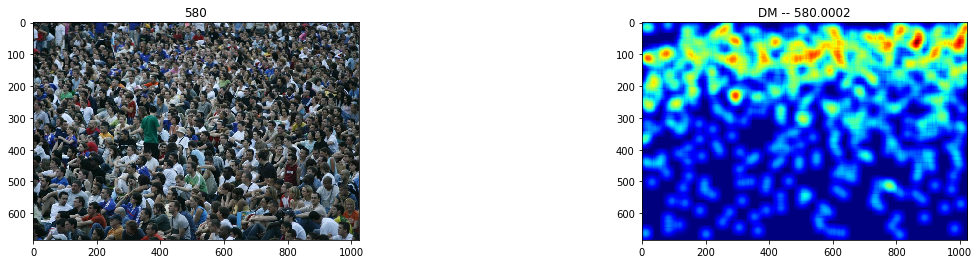

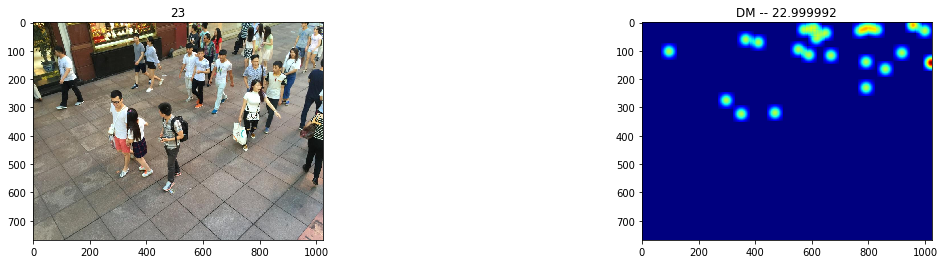

In [8]:
# Show a sample
img_paths = ['/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_196.jpg',
             '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images/IMG_1.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

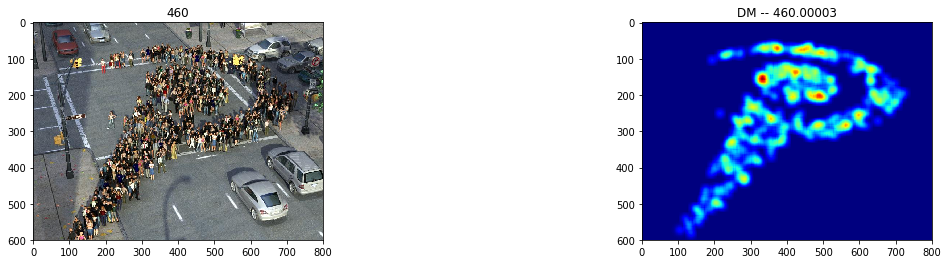

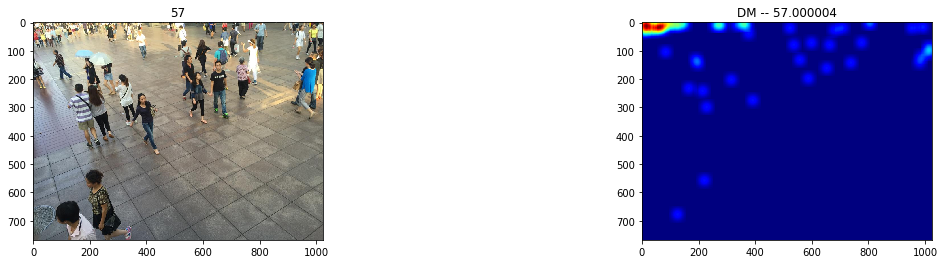

In [9]:
# Show a sample
img_paths = ['/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_197.jpg',
             '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images/IMG_15.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

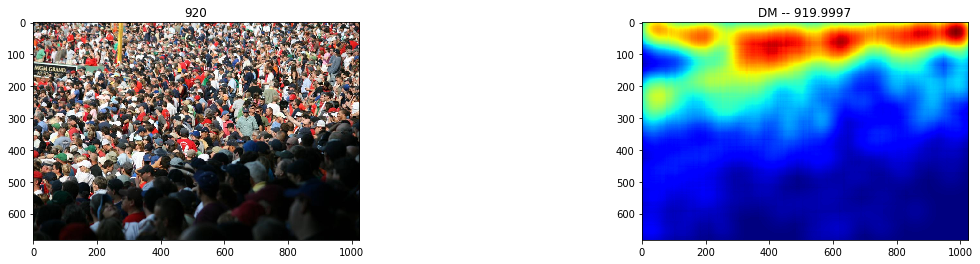

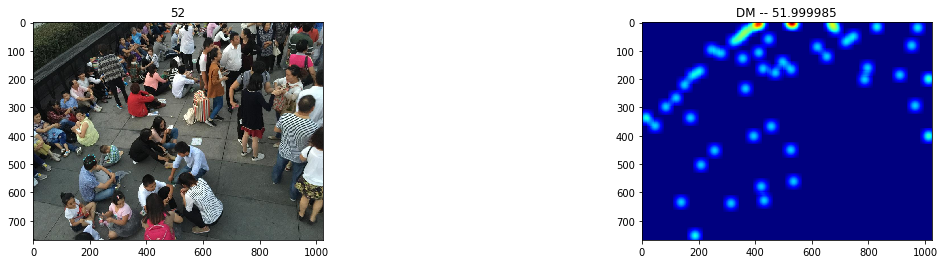

In [10]:
# Show a sample
img_paths = ['/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_10.jpg',
             '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_B/test_data/images/IMG_2.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

### Train/Test

In [11]:
import h5py
print(h5py.__version__)
import cv2
print(cv2.__version__)
import keras
print(keras.__version__)
import tensorflow
print(tensorflow.__version__)
import scipy
print(scipy.__version__)
import tqdm
print(tqdm.__version__)
import matplotlib
print(matplotlib.__version__)
import numpy
print(numpy.__version__)

2.9.0
4.1.1
2.3.1
2.0.0
1.2.1
4.36.1
3.0.3
1.16.4


In [12]:
ls

CSRNet.py                models/
README.md                utils_callback.py
__pycache__/             utils_gen.py
data/                    utils_imgproc.py
generate_datasets.ipynb  utils_loss.py
main.ipynb               weights_A_MSE_bestMAE67.984_Thu-May-23/
materials/               weights_B_MSE_bestMAE8.31_Sun-May-19/


### not working for now

In [30]:
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths
from utils_imgproc import norm_by_imagenet
%matplotlib inline
plt.ioff()

In [144]:
import os
import random
import shutil
import h5py
import numpy as np

# Function to generate image and density map variables from paths
def gen_var_from_paths(paths, stride=8, unit_len=None):
    # Your code to read and preprocess images from paths
    # Replace this with your actual implementation
    return np.random.randn(len(paths), 224, 224, 3)

# Example of image normalization function (assuming you have one, replace it with your actual function)
def norm_by_imagenet(images):
    # Your normalization code here
    # Example: (Replace with your actual code)
    return images / 255.0

# Define the path for Part A
net = 'CSRNet'
dataset_root = '/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/'
img_folder = 'images'
dataset = 'A'
part_a_path = os.path.join(dataset_root, f'part_{dataset}')

# Get the list of image paths for training and testing
train_img_paths = [os.path.join(part_a_path, 'train_data', img_folder, img_name)
                   for img_name in os.listdir(os.path.join(part_a_path, 'train_data', img_folder))]
test_img_paths = [os.path.join(part_a_path, 'test_data', img_folder, img_name)
                  for img_name in os.listdir(os.path.join(part_a_path, 'test_data', img_folder))]

# Update paths for density maps in HDF5 format
train_dm_paths = [os.path.join(part_a_path, 'train_data', 'ground-truth-h5', f'IMG_{i}.h5')
                  for i in range(1, len(train_img_paths) + 1)]
test_dm_paths = [os.path.join(part_a_path, 'test_data', 'ground-truth-h5', f'IMG_{i}.h5')
                 for i in range(1, len(test_img_paths) + 1)]

# Take all data from the train folder for training
train_img_paths = train_img_paths

# Take all data from the test folder for testing
test_img_paths = test_img_paths

# Randomly select 20% of the training data for validation
val_ratio = 0.2
num_val = int(len(train_img_paths) * val_ratio)
val_img_paths = random.sample(train_img_paths, num_val)

# Print example paths
# print("Train Image Paths:")
# for path in train_img_paths:
#     print(path)

# print("\nTest Image Paths:")
# for path in test_img_paths:
#     print(path)

# print("\nValidation Image Paths:")
# for path in val_img_paths:
#     print(path)

# Generate raw images and density maps for test set
test_x, test_y = gen_var_from_paths(test_img_paths[:]), gen_var_from_paths(test_dm_paths[:], stride=8, unit_len=None)
test_x = norm_by_imagenet(test_x)  # Normalize test set images using Imagenet RGB values
print('Test data size:', test_x.shape[0], test_y.shape[0], len(test_img_paths))

# Generate raw images and density maps for train set
train_x, train_y = gen_var_from_paths(train_img_paths[:]), gen_var_from_paths(train_dm_paths[:], stride=8, unit_len=None)
print('Train data size:', train_x.shape[0], train_y.shape[0], len(train_img_paths))


Test data size: 182 182 182
Train data size: 300 300 300


In [145]:
# Assuming train_y is a NumPy array
print(train_y.shape)


(300, 224, 224, 3)


In [146]:
# Assuming train_y is a NumPy array
print(train_x.shape)

(300, 224, 224, 3)


In [33]:
# Delete the directory for saving weights during last training.
weights_dir = 'weights_' + dataset
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)

from keras.optimizers import Adam
from keras.utils import plot_model
from CSRNet import CSRNet


# Create empty directory for saving weights during training
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)
os.makedirs(weights_dir)

# Settings of network
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
LOSS = 'MSE'
optimizer = Adam(lr=1e-5)

# Create my model
model = CSRNet(input_shape=(None, None, 3))
model.compile(optimizer=optimizer, loss='MSE', metrics=['mae'])
model.summary()
if not os.path.exists('models'):
    os.makedirs('models')
plot_model(model, 'models/{}.png'.format(net))
with open('./models/{}.json'.format(net), 'w') as fout:
    fout.write(model.to_json())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, None, None, 64)    1792      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, None, None, 64)    36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, None, None, 64)    0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_106 (Conv2D)          (None, None, None, 128)   147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, None, None, 128)   0   

In [147]:
print("train_y shape:", train_y.shape)
print("train_x shape:", train_x.shape)

train_y shape: (300, 224, 224, 3)
train_x shape: (300, 224, 224, 3)


### 3rd dataset

In [24]:
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths
from utils_imgproc import norm_by_imagenet
%matplotlib inline
plt.ioff()

# Settings
net = 'CSRNet'
dataset = "A"

# Generate paths of (train, test) x (img, dm)
(test_img_paths, train_img_paths), (test_dm_paths, train_dm_paths) = gen_paths_img_dm(
    path_file_root='/kaggle/input/crowd-detection-traintest/paths_train_val_test1',
    dataset=dataset
)

# Update paths to use 'ground-truth-h5' instead of 'ground'
test_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in test_dm_paths]
train_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in train_dm_paths]

# Generate raw images (normalized by imagenet rgb) and density maps
test_x, test_y = gen_var_from_paths(test_img_paths[:], unit_len=None), gen_var_from_paths(test_dm_paths[:], stride=8, unit_len=None)
test_x = norm_by_imagenet(test_x)

print('Test data size:', test_x.shape[0], test_y.shape[0], len(test_img_paths))

train_x, train_y = gen_var_from_paths(train_img_paths[:], unit_len=None), gen_var_from_paths(train_dm_paths[:], stride=8, unit_len=None)
print('Train data size:', train_x.shape[0], train_y.shape[0], len(train_img_paths))

# Delete the directory for saving weights during the last training.
weights_dir = 'weights_' + dataset
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)

/opt/conda/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Test data size: 182 182 182
Train data size: 60 60 60


In [25]:
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths
from utils_imgproc import norm_by_imagenet
%matplotlib inline
plt.ioff()

# Settings
net = 'CSRNet'
dataset = "A"

# Generate paths of (train, test) x (img, dm)
(test_img_paths, train_img_paths), (test_dm_paths, train_dm_paths) = gen_paths_img_dm(
    path_file_root='/kaggle/input/crowd-detection-traintest/paths_train_val_test1',
    dataset=dataset
)

# Print the lengths of the generated paths
print('Test paths:', len(test_img_paths), len(test_dm_paths))
print('Train paths:', len(train_img_paths), len(train_dm_paths))

# Update paths to use 'ground-truth-h5' instead of 'ground'
test_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in test_dm_paths]
train_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in train_dm_paths]

# Generate raw images (normalized by imagenet rgb) and density maps
test_x, test_y = gen_var_from_paths(test_img_paths[:], unit_len=None), gen_var_from_paths(test_dm_paths[:], stride=8, unit_len=None)
test_x = norm_by_imagenet(test_x)

print('Test data size:', test_x.shape[0], test_y.shape[0], len(test_img_paths))

train_x, train_y = gen_var_from_paths(train_img_paths[:], unit_len=None), gen_var_from_paths(train_dm_paths[:], stride=8, unit_len=None)
print('Train data size:', train_x.shape[0], train_y.shape[0], len(train_img_paths))

# Delete the directory for saving weights during the last training.
weights_dir = 'weights_' + dataset
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)

Test paths: 182 182
Train paths: 60 60
Test data size: 182 182 182
Train data size: 60 60 60


In [10]:
import os
import cv2
import time
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from utils_gen import gen_paths_img_dm, gen_var_from_paths
from utils_imgproc import norm_by_imagenet
%matplotlib inline
plt.ioff()

# Settings
net = 'CSRNet'
dataset = "A"

# Generate paths of (train, test) x (img, dm)
(test_img_paths, train_img_paths), (test_dm_paths, train_dm_paths) = gen_paths_img_dm(
    path_file_root='/kaggle/input/crowd-detection-traintest/paths_train_val_test1',
    dataset=dataset
)

# Print the lengths of the generated paths
print('Test paths:', len(test_img_paths), len(test_dm_paths))
print('Train paths:', len(train_img_paths), len(train_dm_paths))

# Update paths to use 'ground-truth-h5' instead of 'ground'
test_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in test_dm_paths]
train_dm_paths = [path.replace('ground', 'ground-truth-h5') for path in train_dm_paths]

# Print the first few train paths to inspect
print('Train paths:')
for path in train_img_paths[:5]:
    print(path)

# Generate raw images (normalized by imagenet rgb) and density maps
test_x, test_y = gen_var_from_paths(test_img_paths[:], unit_len=None), gen_var_from_paths(test_dm_paths[:], stride=8, unit_len=None)
test_x = norm_by_imagenet(test_x)

print('Test data size:', test_x.shape[0], test_y.shape[0], len(test_img_paths))

train_x, train_y = gen_var_from_paths(train_img_paths[:], unit_len=None), gen_var_from_paths(train_dm_paths[:], stride=8, unit_len=None)

# Print the first few train paths after the update
print('Train paths after update:')
for path in train_img_paths[:5]:
    print(path)

print('Train data size:', train_x.shape[0], train_y.shape[0], len(train_img_paths))

# Delete the directory for saving weights during the last training.
weights_dir = 'weights_' + dataset
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)

Test paths: 182 182
Train paths: 60 60
Train paths:
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_1.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_2.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_4.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_5.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_7.jpg
Test data size: 182 182 182
Train paths after update:
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_1.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_2.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_4.jpg
/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/train_data/images/IMG_5.jpg
/ka

## After training

In [11]:
from keras.optimizers import Adam
from CSRNet import CSRNet

# Settings of network
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
LOSS = 'MSE'
optimizer = Adam(lr=1e-5)

# Create my model
model = CSRNet(input_shape=(None, None, 3))
model.compile(optimizer=optimizer, loss='MSE')

# Load the weights
model_path = "/kaggle/input/crowdcsrnet/other/crowd-csrnet/1/CSRNet_best.hdf5"
model.load_weights(model_path)

58892288/58889256 [==============================] - 3s 0us/step


In [13]:
# Get the weights
weights = model.get_weights()

In [14]:
# print the details of weights
for i , weight in enumerate(weights):
    print(f"Weight {i}:")
    print(f"Shape: {weight.shape}")

Weight 0:
Shape: (3, 3, 3, 64)
Weight 1:
Shape: (64,)
Weight 2:
Shape: (3, 3, 64, 64)
Weight 3:
Shape: (64,)
Weight 4:
Shape: (3, 3, 64, 128)
Weight 5:
Shape: (128,)
Weight 6:
Shape: (3, 3, 128, 128)
Weight 7:
Shape: (128,)
Weight 8:
Shape: (3, 3, 128, 256)
Weight 9:
Shape: (256,)
Weight 10:
Shape: (3, 3, 256, 256)
Weight 11:
Shape: (256,)
Weight 12:
Shape: (3, 3, 256, 256)
Weight 13:
Shape: (256,)
Weight 14:
Shape: (3, 3, 256, 512)
Weight 15:
Shape: (512,)
Weight 16:
Shape: (3, 3, 512, 512)
Weight 17:
Shape: (512,)
Weight 18:
Shape: (3, 3, 512, 512)
Weight 19:
Shape: (512,)
Weight 20:
Shape: (3, 3, 512, 512)
Weight 21:
Shape: (512,)
Weight 22:
Shape: (3, 3, 512, 512)
Weight 23:
Shape: (512,)
Weight 24:
Shape: (3, 3, 512, 512)
Weight 25:
Shape: (512,)
Weight 26:
Shape: (3, 3, 512, 256)
Weight 27:
Shape: (256,)
Weight 28:
Shape: (3, 3, 256, 128)
Weight 29:
Shape: (128,)
Weight 30:
Shape: (3, 3, 128, 64)
Weight 31:
Shape: (64,)
Weight 32:
Shape: (1, 1, 64, 1)
Weight 33:
Shape: (1,)


In [21]:
# print the details of weights
for i , weight in enumerate(weights):
    print(f"Weight {i}:")
    print(f"Shape: {weight.shape}")
    print(f"Values: {weight}")

Weight 0:
Shape: (3, 3, 3, 64)
Values: [[[[ 0.42893577  0.11954745  0.03070636 ... -0.13154307 -0.05447062
     0.00485687]
   [ 0.5509794   0.02206977  0.09690623 ... -0.08393852 -0.05373174
     0.03503963]
   [ 0.48006928 -0.17147474  0.03526984 ... -0.12682392 -0.05317304
     0.0318674 ]]

  [[ 0.3738116   0.16376981 -0.00165822 ... -0.1472376  -0.23673762
    -0.06531412]
   [ 0.44153526  0.04821645  0.04965368 ... -0.09774505 -0.29871678
    -0.07235412]
   [ 0.40963492 -0.16947153 -0.00705154 ... -0.12168887 -0.27949214
    -0.04132699]]

  [[-0.0611559   0.13786852 -0.11879756 ... -0.1394885  -0.3789298
    -0.30257744]
   [-0.08015052  0.04286932 -0.10314314 ... -0.09349554 -0.5077298
    -0.38540488]
   [-0.06399364 -0.15335234 -0.139977   ... -0.12912355 -0.4646861
    -0.32582727]]]


 [[[ 0.2745313   0.15000643  0.15975466 ... -0.11354453  0.36530906
     0.33879793]
   [ 0.3465531   0.03161613  0.23956713 ... -0.06834484  0.43564728
     0.41211012]
   [ 0.3108327  -0.18

In [30]:
import sys
import pandas as pd
from time import time, ctime
from utils_imgproc import image_preprocessing
from utils_callback import eval_loss, callbacks_during_train


# Settings of training
batch_size = 1
epoch = 250
val_rate = 0.5
val_rate_dec = {'A': [80, 70], 'B': [9, 8.5]}
len_train = train_x.shape[0]
num_iter = int((len_train-0.1) // batch_size + 1)
best_values = {'mae': 1e5, 'rmse': 1e5, 'sfn': 1e5, 'mape': 1e5}
losses = [[1e5, 1e5, 1e5, 1e5]]
# Settings of display
dis_idx = 16 if dataset == 'B' else 0
dis_path = test_img_paths[dis_idx]
dis_x = test_x[dis_idx]
dis_y = test_y[dis_idx]
dis_lim = (5, 35) if dataset == 'B' else (40, 150)
time_st = time()

0/182
100/182


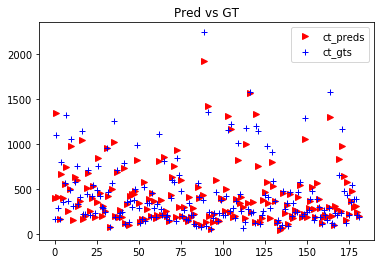

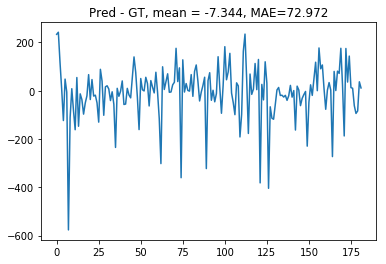

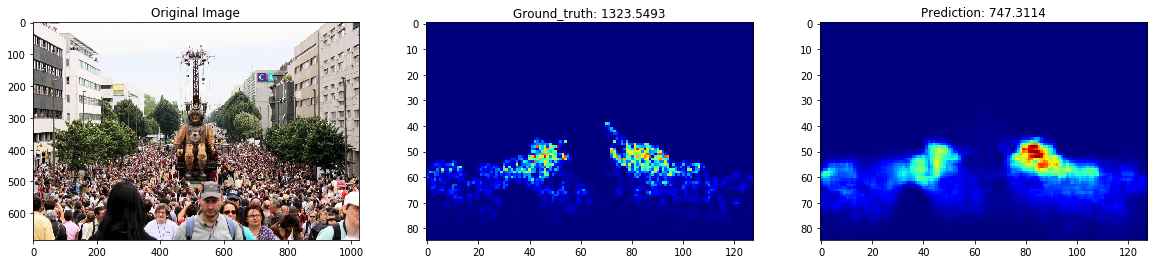

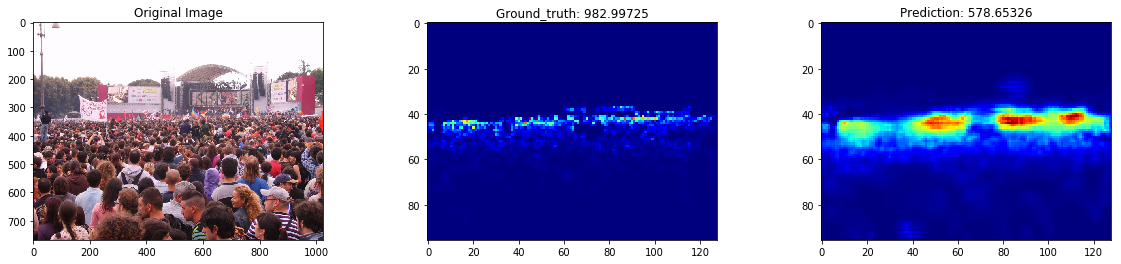

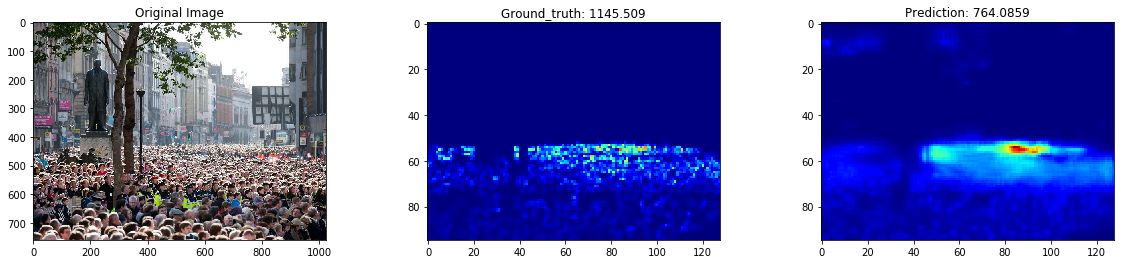

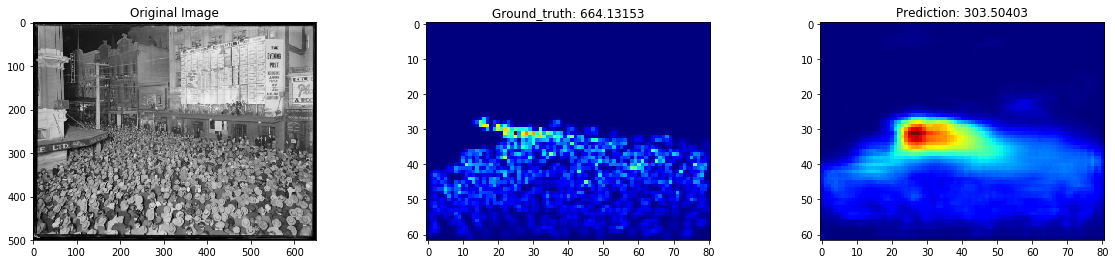

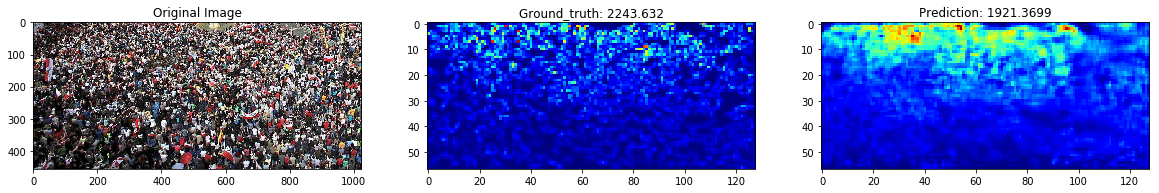

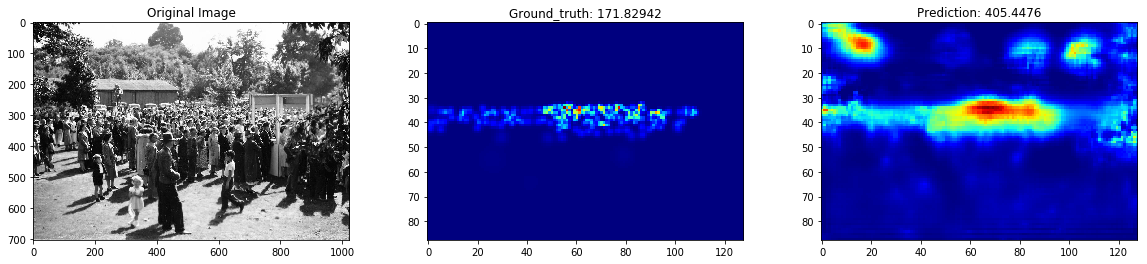

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Assuming you already have the CSRNet model loaded with weights
# model = CSRNet(input_shape=(None, None, 3))
# model.compile(optimizer=optimizer, loss='MSE')
# model.load_weights(model_path)  # Assuming you have already loaded the weights

ct_preds = []
ct_gts = []

for i in range(len(test_x)):
    if i % 100 == 0:
        print('{}/{}'.format(i, len(test_x)))

    test_x_display = np.squeeze(test_x[i])
    test_y_display = np.squeeze(test_y[i])
    path_test_display = test_img_paths[i]

    # Use the loaded CSRNet model to make predictions
    pred = np.squeeze(model.predict(np.expand_dims(test_x_display, axis=0)))

    ct_pred = np.sum(pred)
    ct_gt = round(np.sum(test_y_display))

    ct_preds.append(ct_pred)
    ct_gts.append(ct_gt)

# Plotting predictions vs ground truth
plt.plot(ct_preds, 'r>')
plt.plot(ct_gts, 'b+')
plt.legend(['ct_preds', 'ct_gts'])
plt.title('Pred vs GT')
plt.show()

# Plotting prediction errors
error = np.array(ct_preds) - np.array(ct_gts)
plt.plot(error)
plt.title('Pred - GT, mean = {}, MAE={}'.format(
    str(round(np.mean(error), 3)),
    str(round(np.mean(np.abs(error)), 3))
))
plt.show()


# Finding indices of samples with maximum errors
idx_max_error = np.argsort(np.abs(error))[::-1]
# Show the 5 worst samples
for worst_idx in idx_max_error[:5].tolist() + [dis_idx]:
    test_x_display = np.squeeze(test_x[worst_idx])
    test_y_display = np.squeeze(test_y[worst_idx])
    path_test_display = test_img_paths[worst_idx]

    # Use the loaded CSRNet model to make predictions for worst samples
    pred = np.squeeze(model.predict(np.expand_dims(test_x_display, axis=0)))

    fg, (ax_x_ori, ax_y, ax_pred) = plt.subplots(1, 3, figsize=(20, 4))
    ax_x_ori.imshow(cv2.cvtColor(cv2.imread(path_test_display), cv2.COLOR_BGR2RGB))
    ax_x_ori.set_title('Original Image')
    ax_y.imshow(test_y_display, cmap=plt.cm.jet)
    ax_y.set_title('Ground_truth: ' + str(np.sum(test_y_display)))
    ax_pred.imshow(pred, cmap=plt.cm.jet)
    ax_pred.set_title('Prediction: ' + str(np.sum(pred)))
    plt.show()

In [32]:
# Generate losses and the image quality
# model = model_from_json(open('models/{}.json'.format(net), 'r').read())
# model.load_weights('{}/{}_best.hdf5'.format('weights_', net))
# from utils_callback import eval_loss
lossMAE, lossRMSE, lossSFN, lossMAPE, PSNR, SSIM = eval_loss(
    model, test_x, test_y, quality=True
)
print(lossMAE, lossRMSE, lossSFN, lossMAPE, PSNR, SSIM)

/kaggle/working/CSRNet-Keras/utils_callback.py:46: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr_ = compare_psnr(preds[idx_pd], DM[idx_pd], data_range=data_range)
/kaggle/working/CSRNet-Keras/utils_callback.py:47: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_ = compare_ssim(preds[idx_pd], DM[idx_pd], data_range=data_range)


72.97164 111.807 2.0594606 0.20385706 24.040102040577263 0.6350513317458407


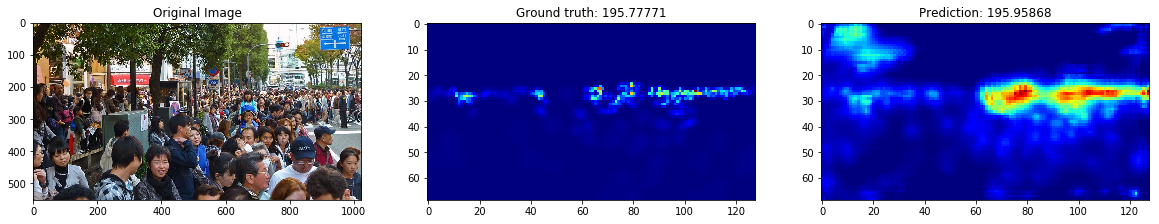

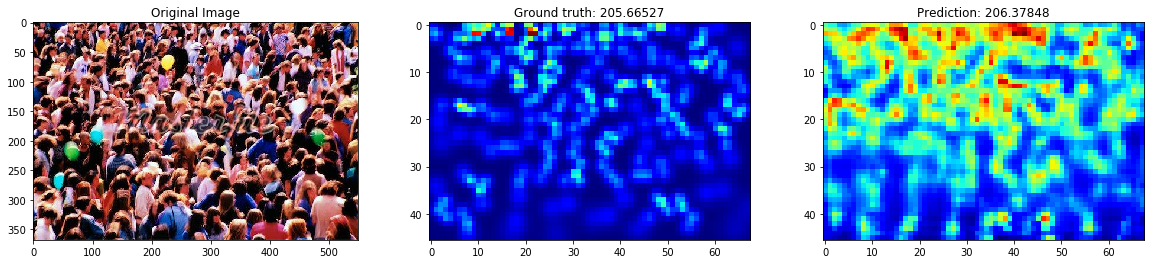

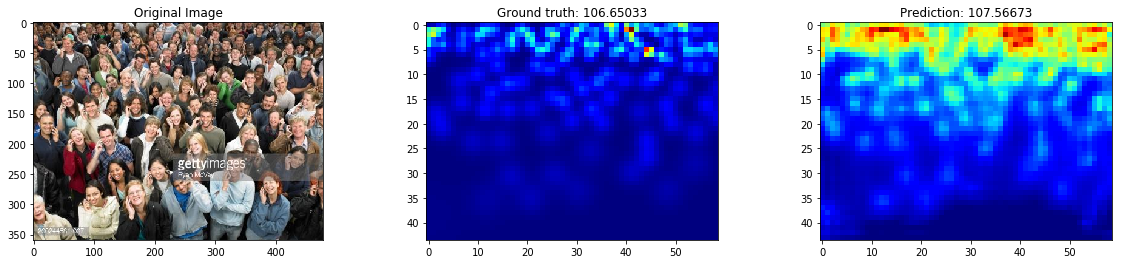

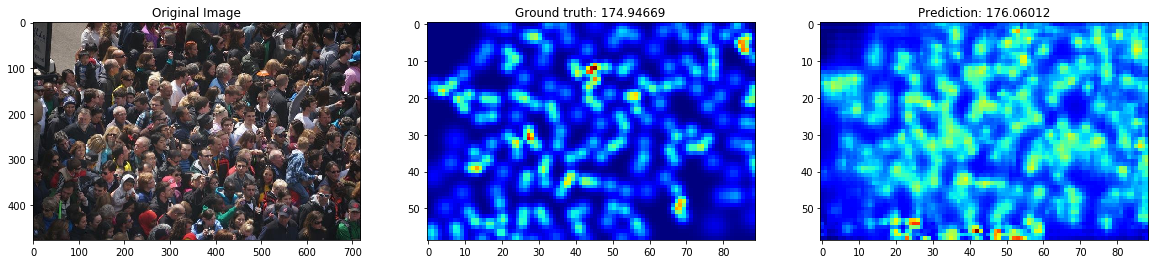

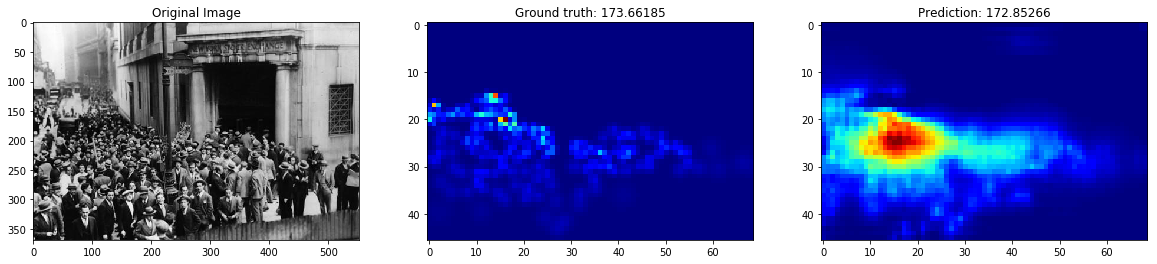

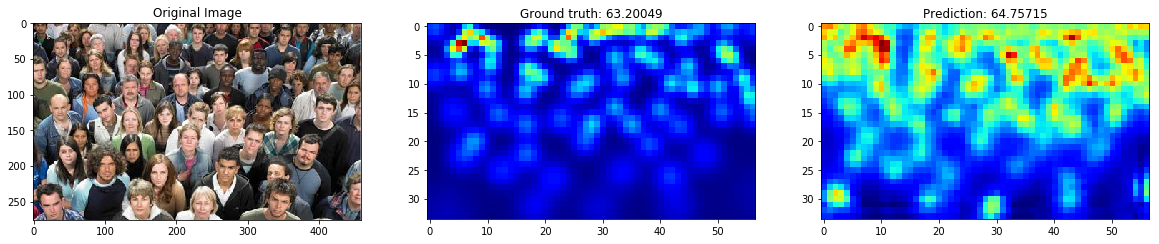

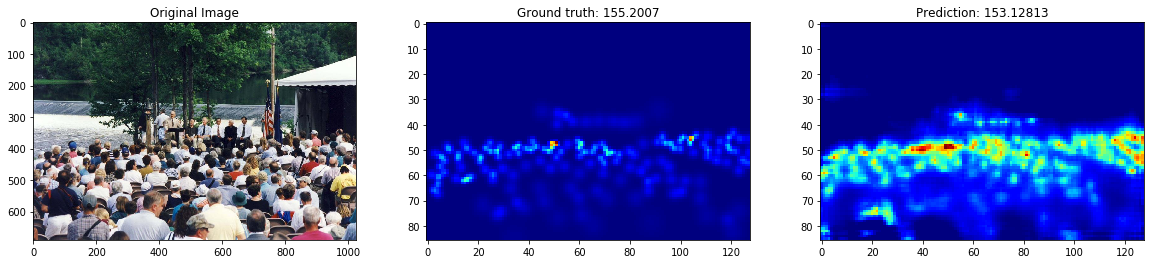

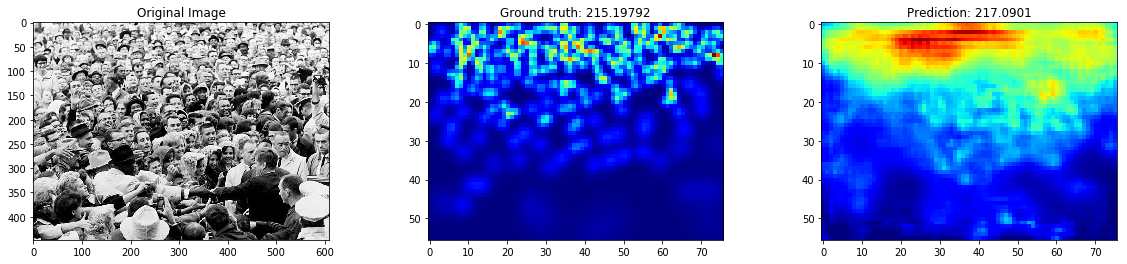

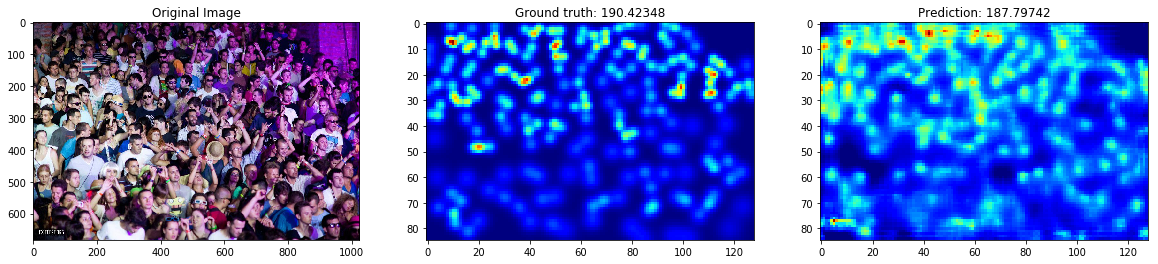

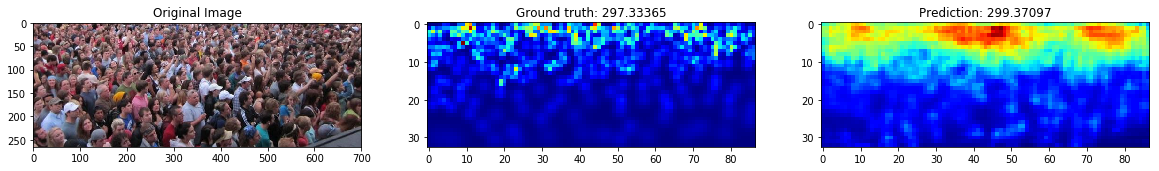

In [34]:
# finding indices of samples with minimum errors
idx_min_error = np.argsort(np.abs(error))

# show the 10 best samples
for best_idx in idx_min_error[:10]:
    test_x_display = np.squeeze(test_x[best_idx])
    test_y_display = np.squeeze(test_y[best_idx])
    path_test_display = test_img_paths[best_idx]
    
    # use loaded csrnet model to make predictions for best samples
    pred = np.squeeze(model.predict(np.expand_dims(test_x_display, axis=0)))
    
    fg, (ax_x_ori, ax_y, ax_pred) = plt.subplots(1,3, figsize=(20, 4))
    ax_x_ori.imshow(cv2.cvtColor(cv2.imread(path_test_display), cv2.COLOR_BGR2RGB))
    ax_x_ori.set_title('Original Image')
    
    ax_y.imshow(test_y_display, cmap=plt.cm.jet)
    ax_y.set_title(f'Ground truth: {str(np.sum(test_y_display))}')
    
    ax_pred.imshow(pred, cmap=plt.cm.jet)
    ax_pred.set_title(f'Prediction: {str(np.sum(pred))}')
    plt.show()

## Test with new dataset image

In [42]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/test_data/images/IMG_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map))

print("Estimated Crowd Count:", estimated_crowd_count)

Estimated Crowd Count: 10991


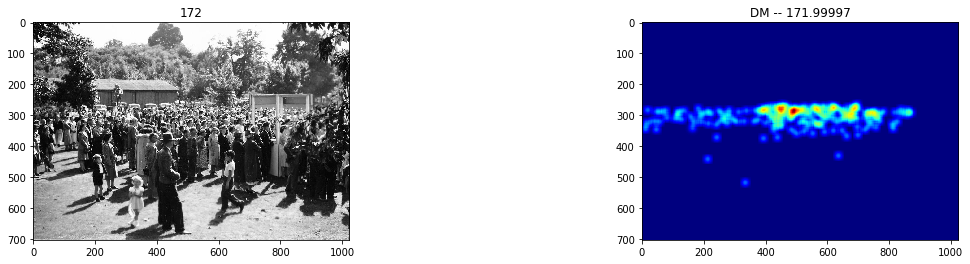

In [44]:
# Show a sample
img_paths = ['/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/test_data/images/IMG_1.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground-truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1

    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0]))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+str(np.sum(DM)))
    plt.show()

In [45]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/test_data/images/IMG_2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map))

print("Estimated Crowd Count:", estimated_crowd_count)


Estimated Crowd Count: 53602


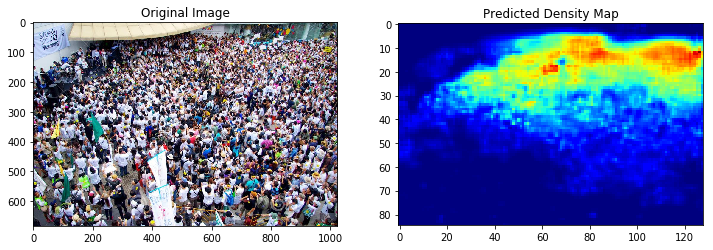

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/test_data/images/IMG_2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='jet')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

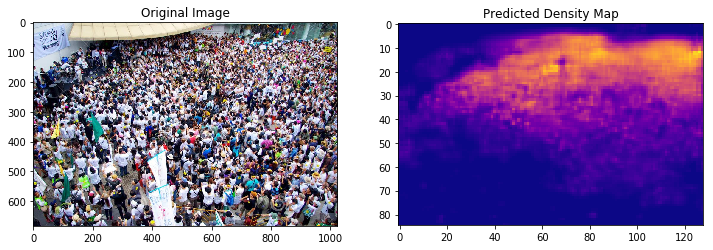

Estimated Crowd Count: 53602


In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/shanghaitech-with-people-density-map/ShanghaiTech/part_A/test_data/images/IMG_2.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Visualize the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Visualize the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(predicted_density_map[0, :, :, 0], cmap='plasma')  # Assuming channel last
plt.title('Predicted Density Map')

plt.show()

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map))

print("Estimated Crowd Count:", estimated_crowd_count)

In [102]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/crowd-detection/OIP.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map1 = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map1))

print("Estimated Crowd Count:", estimated_crowd_count)


Estimated Crowd Count: 1781


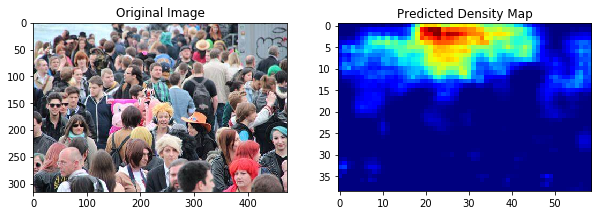

In [103]:
import matplotlib.pyplot as plt

# Assuming 'predicted_density_map' is the predicted density map obtained from your model

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map1 / np.max(predicted_density_map1)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='jet', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()


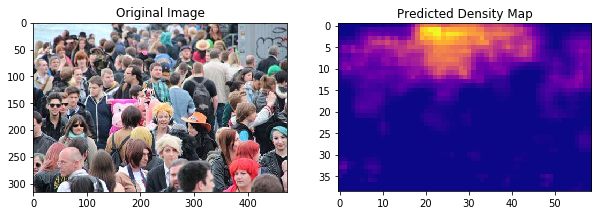

In [105]:
import matplotlib.pyplot as plt

# Assuming 'predicted_density_map' is the predicted density map obtained from your model

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map1 / np.max(predicted_density_map1)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='plasma', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()

In [134]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/crowd-detection/R.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Preprocess the image (resize or normalize based on your training preprocessing)
# Ensure the preprocessing is consistent with what was done during training
# For example, you may need to resize the image to match the input size used during training

# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map2 = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map2))

print("Estimated Crowd Count:", estimated_crowd_count)


Estimated Crowd Count: 33996


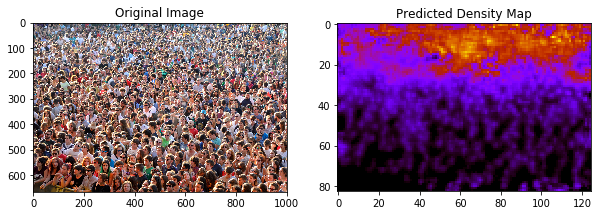

In [135]:
import matplotlib.pyplot as plt

# Assuming 'predicted_density_map' is the predicted density map obtained from your model

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map2 / np.max(predicted_density_map2)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='gnuplot', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()


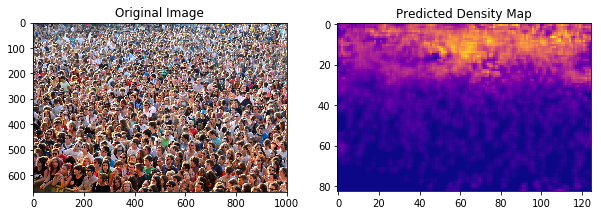

                                                  Estimated Crowd Count: 33996


In [141]:
import matplotlib.pyplot as plt

# Assuming 'predicted_density_map' is the predicted density map obtained from your model

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map2 / np.max(predicted_density_map2)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='plasma', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()


# Expand dimensions to create a batch of size 1 (as the model expects batches)
input_image = np.expand_dims(image, axis=0)

# Make predictions
predicted_density_map2 = model.predict(input_image)

# Assuming you want to get the crowd count, you can sum the values in the density map
estimated_crowd_count = int(np.sum(predicted_density_map2))
 
print("                                                  Estimated Crowd Count:", estimated_crowd_count)

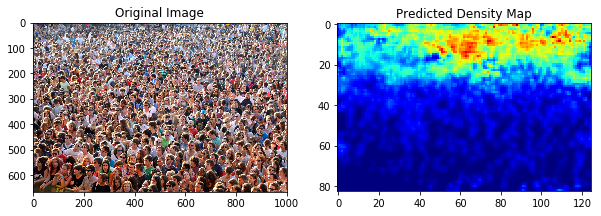

In [143]:
import matplotlib.pyplot as plt

# Assuming 'predicted_density_map' is the predicted density map obtained from your model

# Normalize the density map values to be in the range [0, 1] for better visualization
normalized_density_map = predicted_density_map2 / np.max(predicted_density_map2)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Display the predicted density map as a heatmap using the 'viridis' colormap
plt.subplot(1, 2, 2)
plt.imshow(normalized_density_map[0, :, :, 0], cmap='jet', interpolation='nearest')
plt.title('Predicted Density Map')

plt.show()
